In [ ]:
import importlib.util
import os
import matplotlib.pyplot as plt

print("--- Script: generate_financial_plots.py ---")
print("--- Chunk 1: Setup and Module Import ---")

script_filename = 'T(s,a)_to_d.py' 
module_name_in_code = 'fda'        
fda_module = None                 

try:
    script_path = os.path.join(os.getcwd(), script_filename)
    if not os.path.exists(script_path):
        raise FileNotFoundError(f"The script '{script_path}' was not found. Please ensure it's in the same directory.")
        
    spec = importlib.util.spec_from_file_location(module_name_in_code, script_path)
    
    if spec is None:
        raise ImportError(f"Could not load spec for module from file: {script_path}.")
    
    fda_module = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(fda_module) # Execute the module
    
    print(f"Successfully imported module '{script_filename}' as '{module_name_in_code}'.")
    
except Exception as e:
    print(f"CRITICAL ERROR: Failed to import module '{script_filename}': {e}")
    print("Cannot proceed with plotting.")

plt.rcParams['figure.figsize'] = (12, 6)

--- Script: generate_financial_plots.py ---
--- Chunk 1: Setup and Module Import ---
Successfully imported module 'T(s,a)_to_d.py' as 'fda'.


In [2]:
print("\n--- Chunk 2: Fetch and Store Data ---")
fetch_success = False
data_file = None

if fda_module: # Proceed only if module was loaded
    fetch_success, data_file = fda_module.fetch_and_store_data()
    if fetch_success:
        print(f"Data fetching and storage successful. Data is in: {data_file}")
    else:
        print("Data fetching and storage FAILED. Check T(s,a)_to_d.py output for details.")
else:
    print("Module not loaded. Skipping data fetching.")


--- Chunk 2: Fetch and Store Data ---
FRED API Key loaded.
Data.gov API Key loaded.
--- Starting Data Fetching (2015-05-20 to 2025-05-17) ---
No tickers specified for Yahoo Finance, skipping yfinance fetch.

Fetching data from FRED...
Successfully fetched US_2Y_Treasury (DGS2) from FRED.
Successfully fetched US_10Y_Treasury (DGS10) from FRED.
Successfully fetched USD_Index_FRED (DTWEXBGS) from FRED.
Successfully fetched EUR_USD_FRED (DEXUSEU) from FRED.
Successfully fetched GBP_USD_FRED (DEXUSUK) from FRED.
Successfully fetched JPY_PER_USD_FRED (DEXJPUS) from FRED.
Successfully fetched US_Regular_Conventional_Gas_price (GASREGCOVW) from FRED.
Successfully fetched Natural_Gas_Exports_Index (IQ112) from FRED.
Successfully fetched Natural_Gas_Imports_Index (IR10110) from FRED.
Successfully fetched Natural_Gas_Consumption (NATURALGASD11) from FRED.
Successfully fetched Crude_Import_price_Index (IR10000) from FRED.
Successfully fetched CBOE_Crude_Oil_ETF_Volatility_Index (OVXCLS) from FRED

In [3]:
print("\n--- Chunk 3: Load and Prepare Data for Plotting ---")
original_df = None
standardized_df = None

if fda_module and fetch_success and data_file:
    original_df, standardized_df = fda_module.load_and_prepare_data_for_plotting(data_file)
    if original_df is not None and standardized_df is not None:
        print("Data loaded and prepared for plotting.")
        print("\nSample of Original Data (first 3 rows):")
        print(original_df.head(3)) # Using print for script output
        print("\nSample of Standardized Data (first 3 rows, first 5 columns if available):")
        print(standardized_df.iloc[:, :min(5, len(standardized_df.columns))].head(3))
    else:
        print("Failed to load or prepare data from the stored file. Check T(s,a)_to_d.py output.")
else:
    print("Skipping data loading due to previous errors or missing data file.")



--- Chunk 3: Load and Prepare Data for Plotting ---

--- Reading data from 'combined_state.txt' for plotting ---
Data loaded successfully. Standardizing relevant series...
Original columns available: ['US_2Y_Treasury', 'US_10Y_Treasury', 'USD_Index_FRED', 'EUR_USD_FRED', 'GBP_USD_FRED', 'JPY_PER_USD_FRED', 'US_Regular_Conventional_Gas_price', 'Natural_Gas_Exports_Index', 'Natural_Gas_Imports_Index', 'Natural_Gas_Consumption', 'Crude_Import_price_Index', 'CBOE_Crude_Oil_ETF_Volatility_Index', 'WTI', 'Brent', 'Producer_Price_Index_Gasoline', 'Producer_Price_Index_Final_Demand_Energy', 'Avg_Gasoline_Unleaded_Regular', 'USD_PER_JPY_FRED']
Standardized USD_Index_FRED as USD_Index_FRED_std
Standardized US_2Y_Treasury as US_2Y_Treasury_std
Standardized US_10Y_Treasury as US_10Y_Treasury_std
Standardized EUR_USD_FRED as EUR_USD_FRED_std
Standardized GBP_USD_FRED as GBP_USD_FRED_std
Standardized USD_PER_JPY_FRED as USD_PER_JPY_FRED_std
Standardized Brent as Brent_std
Standardized WTI as WTI_st


--- Chunk 4: Generate and Display Plots ---

Generating Plot 1: Standardized USD Index, 2-Year & 10-Year Treasury Yields...


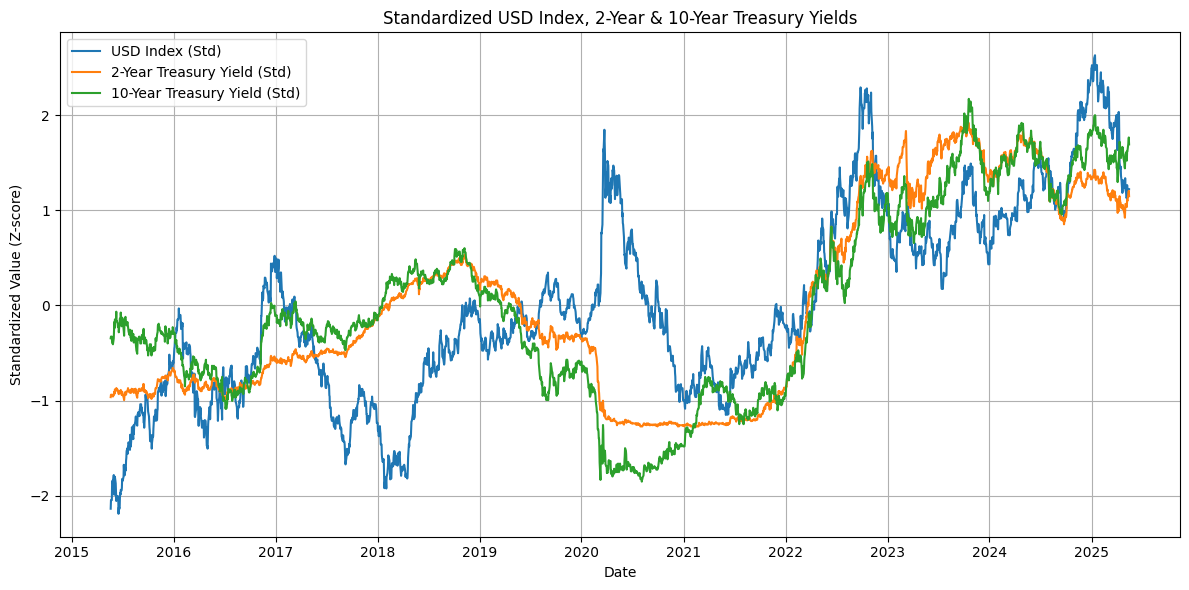


Generating Plot 2: Treasury Yield Difference (Original Values)...


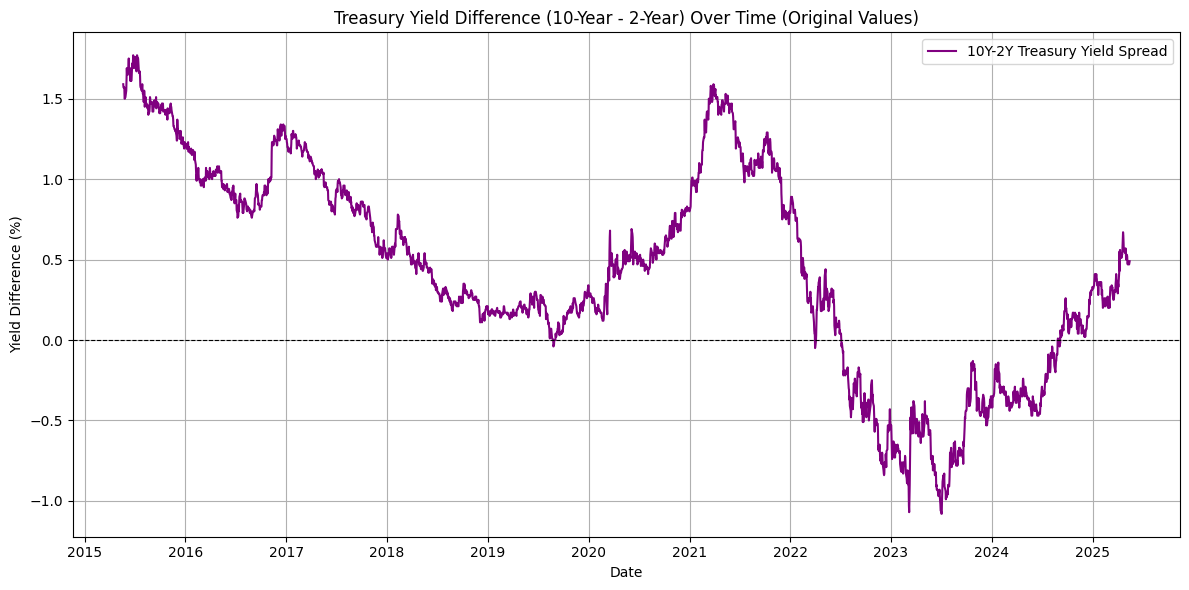


Generating Plot 3: Standardized USD Index, Treasuries & FX Rates...


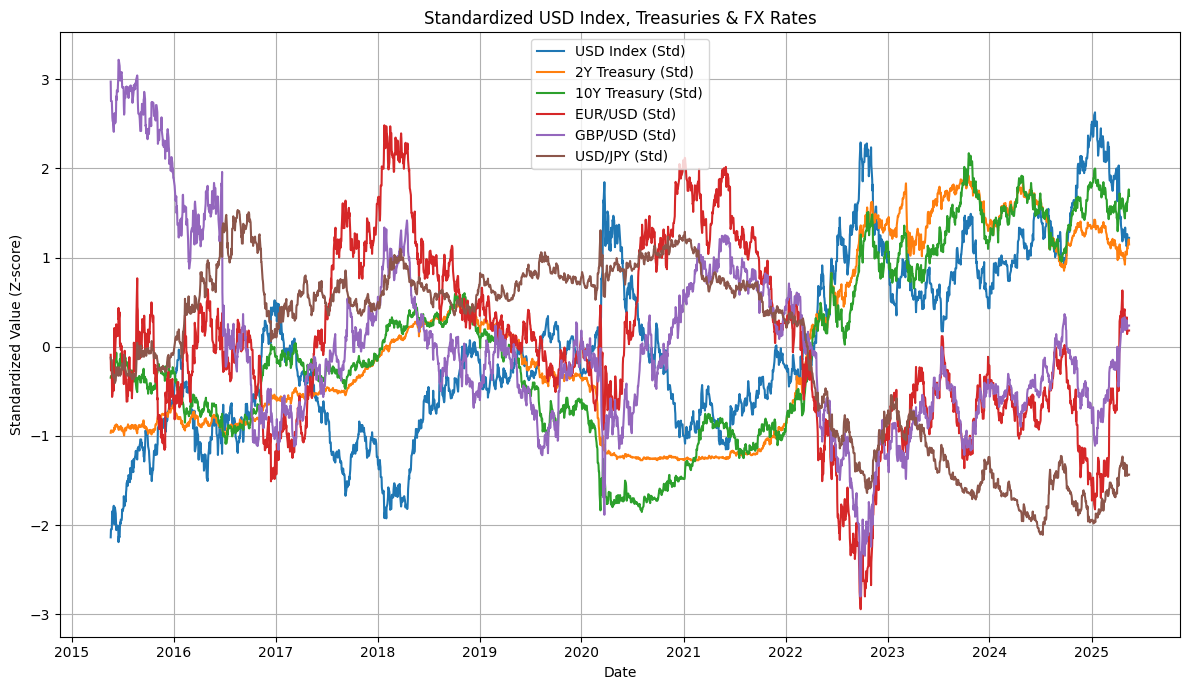


Generating Plot 4: Standardized USD Index, Treasuries, Brent & WTI Oil Prices...


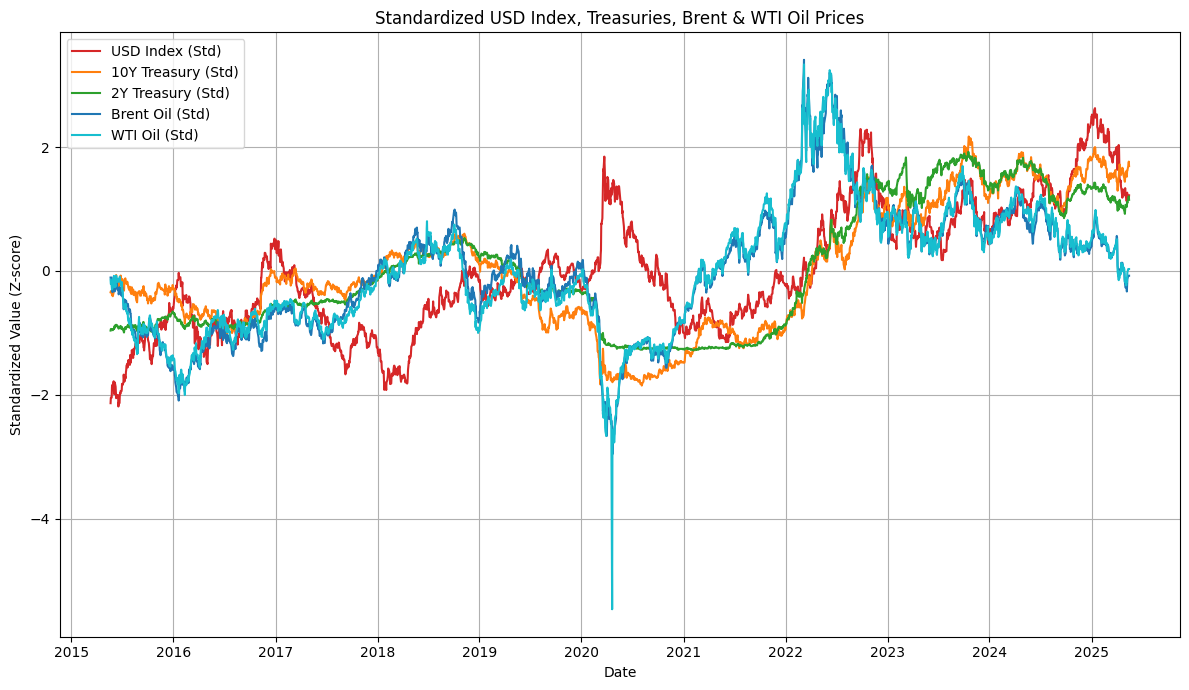


--- Script: generate_financial_plots.py finished ---


In [ ]:

print("\n--- Chunk 4: Generate and Display Plots ---")

if fda_module and original_df is not None and standardized_df is not None:
    # Plot 1
    print("\nGenerating Plot 1: Standardized USD Index, 2-Year & 10-Year Treasury Yields...")
    if not standardized_df.empty:
        fda_module.plot_standardized_usd_treasuries(standardized_df)
    else:
        print("Standardized data is empty. Skipping Plot 1.")

    # Plot 2
    print("\nGenerating Plot 2: Treasury Yield Difference (Original Values)...")
    if not original_df.empty:
        fda_module.plot_treasury_spread(original_df)
    else:
        print("Original data is empty. Skipping Plot 2.")

    # Plot 3
    print("\nGenerating Plot 3: Standardized USD Index, Treasuries & FX Rates...")
    if not standardized_df.empty:
        fda_module.plot_standardized_fx_treasuries(standardized_df)
    else:
        print("Standardized data is empty. Skipping Plot 3.")

    # Plot 4
    print("\nGenerating Plot 4: Standardized USD Index, Treasuries, Brent & WTI Oil Prices...")
    if not standardized_df.empty:
        fda_module.plot_standardized_usd_treasuries_commodities(standardized_df)
    else:
        print("Standardized data is empty. Skipping Plot 4.")
else:
    print("Data not available or module not loaded. Skipping plot generation.")

print("\n--- Script: generate_financial_plots.py finished ---")
